In [1]:
# !pip install -U  aws_requests_auth imblearn

In [1]:
import sys

sys.path.insert(0, "./src/")

In [2]:
import boto3
from package import config
import uuid


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [3]:
# s3 = boto3.resource("s3", region_name=config.AWS_REGION)
# s3.Object(
#     f"{config.SOLUTIONS_S3_BUCKET}-{config.AWS_REGION}",
#     f"{config.SOLUTION_NAME}/data/creditcardfraud.zip",
# ).download_file("creditcardfraud.zip")


In [4]:
from zipfile import ZipFile

# with ZipFile("creditcardfraud.zip", "r") as zf:
#     zf.extractall()

In [22]:
import numpy as np
import pandas as pd

data = pd.read_csv("creditcard.csv", delimiter=",")

In [2]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<Axes: >

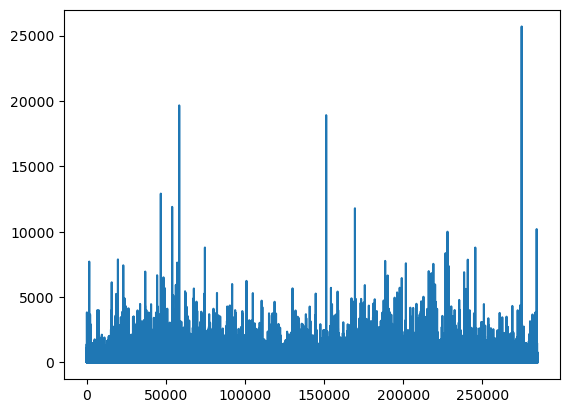

In [8]:
data['Amount'].plot()

<Axes: >

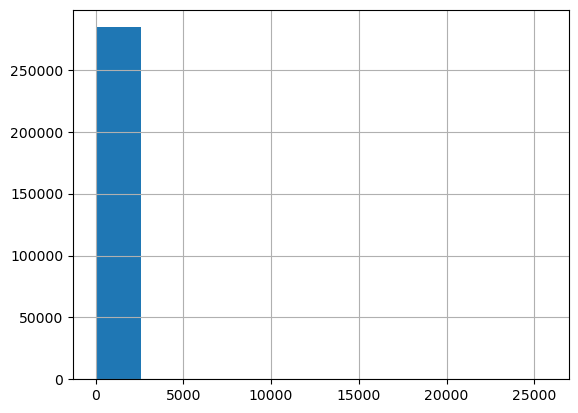

In [9]:
data['Amount'].hist()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<Axes: >

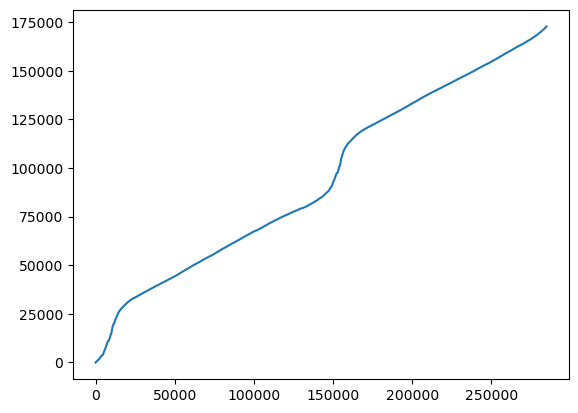

In [11]:
data['Time'].plot()

In [4]:
data['Class'].describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [6]:
data['Class'].unique()

array([0, 1])

<Axes: >

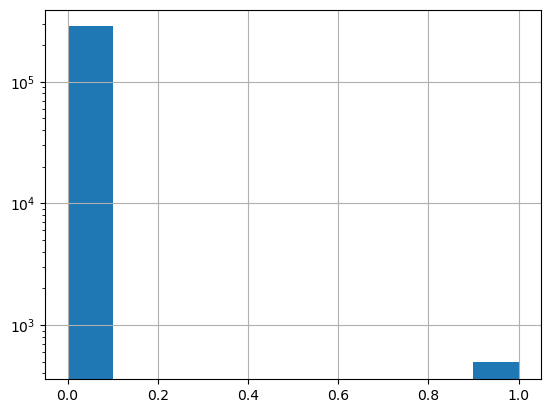

In [10]:
data['Class'].hist(log=True)

In [11]:
import sagemaker
import boto3
from sagemaker import get_execution_role
import uuid

In [13]:
sm_session = sagemaker.Session()

In [16]:
sm_role = get_execution_role()

In [18]:
region = boto3.Session().region_name

In [22]:
bucket = sm_session.default_bucket()

In [23]:
bucket

'sagemaker-us-east-1-287758680514'

In [27]:
prefix = 'fraud-detect-rcf-jan-21'

In [28]:
instance_type_train = 'ml.m4.xlarge'

In [6]:
unique_hash = str(uuid.uuid4())[:5]

In [39]:
training_job_name = f"fraud-detect-rcf-train-job--{unique_hash}"

In [40]:
training_job_name

'fraud-detect-rcf-train-job--5bb4b'

In [41]:
from sagemaker import RandomCutForest

print(
    f"You can go to SageMaker -> Training -> Training jobs -> a job name started with {training_job_name} to monitor training status and details."
)

# specify general training job information
rcf = RandomCutForest(
    role=sm_role,
    instance_count=1,
    instance_type=instance_type_train,
    data_location="s3://{}/{}/".format(bucket, prefix),
    output_path="s3://{}/{}/output".format(bucket, prefix),
    base_job_name=training_job_name,
    num_samples_per_tree=512,
    num_trees=50,
)

You can go to SageMaker -> Training -> Training jobs -> a job name started with fraud-detect-rcf-train-job--5bb4b to monitor training status and details.


In [23]:
feature_cols = data.columns[:-1]

In [24]:
label_cols = data.columns[-1]

In [25]:
label_cols

'Class'

In [26]:
features = data[feature_cols].values.astype("float32")

In [27]:
features

array([[ 0.0000000e+00, -1.3598071e+00, -7.2781175e-02, ...,
         1.3355838e-01, -2.1053053e-02,  1.4962000e+02],
       [ 0.0000000e+00,  1.1918571e+00,  2.6615071e-01, ...,
        -8.9830989e-03,  1.4724169e-02,  2.6900001e+00],
       [ 1.0000000e+00, -1.3583541e+00, -1.3401631e+00, ...,
        -5.5352796e-02, -5.9751842e-02,  3.7866000e+02],
       ...,
       [ 1.7278800e+05,  1.9195650e+00, -3.0125386e-01, ...,
         4.4547720e-03, -2.6560828e-02,  6.7879997e+01],
       [ 1.7278800e+05, -2.4044006e-01,  5.3048253e-01, ...,
         1.0882074e-01,  1.0453282e-01,  1.0000000e+01],
       [ 1.7279200e+05, -5.3341252e-01, -1.8973334e-01, ...,
        -2.4153087e-03,  1.3648914e-02,  2.1700000e+02]], dtype=float32)

In [28]:
labels = (data[label_cols]).values.astype("float32")

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.1, random_state=42
)

In [65]:
np.mean(y_test), np.mean(y_train), X_train.shape, X_test.shape

(0.0016151118, 0.0017399718, (256326, 30), (28481, 30))

In [66]:
rcf.fit(rcf.record_set(X_train))

INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating training-job with name: fraud-detect-rcf-train-job--5bb4b-2024-01-21-18-16-15-776


2024-01-21 18:16:16 Starting - Starting the training job...
2024-01-21 18:16:32 Starting - Preparing the instances for training......
2024-01-21 18:17:41 Downloading - Downloading input data......
2024-01-21 18:18:20 Downloading - Downloading the training image......
2024-01-21 18:19:30 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
/opt/amazon/lib/python3.8/site-packages/mxnet/model.py:97: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if num_device is 1 and 'dist' not in kvstore:
/opt/amazon/lib/python3.8/site-packages/scipy/optimize/_shgo.py:495: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if cons['type'] is 'ineq':
/opt/amazon/lib/python3.8/site-packages/scipy/optimize/_shgo.py:743: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(self.X_min) is not 0:
[01/21/2024 18:19:51 INFO 139995343583040] Reading default configuration

In [8]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

model_name = f"model-fraud-detect-rcf-train-job--{unique_hash}"
endpoint_name = model_name
# instance_type_inference = "ml.g4dn.2xlarge"
instance_type_inference = "ml.inf2.xlarge"

# rcf_predictor = rcf.deploy(
#     model_name=model_name,
#     endpoint_name=endpoint_name,
#     initial_instance_count=1,
#     instance_type=instance_type_inference,  # use a smaller instance for endpoint deployment
#     serializer=CSVSerializer(),
#     deserializer=JSONDeserializer(),
# )

NameError: name 'rcf' is not defined

In [13]:
sm_client = boto3.client("sagemaker")

In [14]:
paginator  = sm_client.get_paginator('list_training_jobs')

In [22]:
# for tj in paginator.paginate():
#     for page in tj['TrainingJobSummaries']:
#         print (page['TrainingJobName'])

In [23]:
# dir(sm_client)

In [3]:
training_job_name = 'fraud-detect-rcf-train-job--5bb4b-2024-01-21-18-16-15-776'

In [4]:
from sagemaker.estimator import Estimator

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [5]:
attached_estimator = Estimator.attach(training_job_name)


2024-01-21 18:20:12 Starting - Preparing the instances for training
2024-01-21 18:20:12 Downloading - Downloading the training image
2024-01-21 18:20:12 Training - Training image download completed. Training in progress.
2024-01-21 18:20:12 Uploading - Uploading generated training model
2024-01-21 18:20:12 Completed - Training job completed


In [30]:
attached_estimator

In [33]:
# dir(attached_estimator)

In [38]:
# attached_estimator.base_job_name = training_job_name
# attached_estimator.instance_type = "ml.inf2.xlarge"
# attached_estimator.instance_count = 1

# model_name = f"model-fraud-detect-rcf-train-job--{unique_hash}"
# endpoint_name = model_name
# # instance_type_inference = "ml.g4dn.2xlarge"
# instance_type_inference = "ml.inf2.xlarge"

In [50]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

In [53]:

attached_estimator.deploy(
    model_name='fraud-detect-rcf-train-job-csv',
    endpoint_name='fraud-detect-rcf-train-job-csv',
    initial_instance_count =1 , instance_type=  "ml.m5.4xlarge", 
                         serializer=CSVSerializer(),
    deserializer=JSONDeserializer(),
)

----------!

In [14]:
paginator = sm_client.get_paginator('list_endpoints')


In [54]:
for page in paginator.paginate():
    print (page['Endpoints'][0]['EndpointName'])

fraud-detect-rcf-train-job-csv


In [55]:
endpoint_name = 'fraud-detect-rcf-train-job-csv'

In [56]:
from sagemaker.predictor import Predictor
predictor = Predictor(endpoint_name=endpoint_name)

In [65]:
def predict_rcf(current_predictor, data, rows=500):
    split_array = np.array_split(data, int(data.shape[0] / float(rows) + 1))
    predictions = []
    for index, array in enumerate(split_array):
        # print (np.array2string(array))
        str =np.array2string(array)
        # print (index)
        array_preds = [s["score"] for s in current_predictor.predict(str)["scores"]]
        predictions.append(array_preds)

    return np.concatenate([np.array(batch) for batch in predictions])

In [66]:
scores = predict_rcf(predictor, X_test)

ModelError: An error occurred (ModelError) when calling the InvokeEndpoint operation: Received client error (415) from primary with message "content-type application/octet-stream not supported". See https://us-east-1.console.aws.amazon.com/cloudwatch/home?region=us-east-1#logEventViewer:group=/aws/sagemaker/Endpoints/fraud-detect-rcf-train-job-csv in account 287758680514 for more information.